# Heart Disease Prediction — Improved pipeline

This notebook loads the dataset, performs EDA, cleaning, feature engineering, handles class imbalance, trains multiple models with hyperparameter tuning, evaluates them, and saves the best pipelines and a results summary.

Run cells sequentially. Created by ChatGPT per your request.

In [2]:

import pandas as pd
df = pd.read_csv('final.csv')
print('Loaded shape:', df.shape)
df.sample(10)

Loaded shape: (319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
194636,No,23.72,No,No,No,0.0,0.0,No,Male,30-34,White,No,Yes,Excellent,7.0,No,No,No
125305,No,25.11,No,No,Yes,0.0,0.0,No,Male,70-74,White,No,Yes,Very good,8.0,No,No,Yes
65916,No,25.69,No,No,No,0.0,30.0,No,Male,18-24,Hispanic,No,Yes,Good,5.0,No,No,No
283783,No,24.96,No,No,No,0.0,0.0,No,Female,80 or older,White,No,No,Very good,4.0,No,No,No
65090,No,28.29,Yes,No,No,0.0,0.0,No,Male,70-74,Other,Yes,Yes,Good,5.0,No,No,No
9938,No,39.33,No,No,No,0.0,0.0,Yes,Male,60-64,White,No,No,Very good,8.0,No,No,No
2572,No,21.93,No,Yes,No,7.0,30.0,No,Female,50-54,White,No,No,Good,5.0,No,No,No
283814,No,28.29,No,No,No,0.0,0.0,No,Female,80 or older,White,No,No,Good,8.0,No,No,No
191666,No,28.06,Yes,No,No,0.0,30.0,No,Male,30-34,White,No,Yes,Very good,5.0,No,No,No
46028,No,21.26,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [6]:
# EDA
import numpy as np
print(df.dtypes.value_counts())
print('\nSummary stats:')
display(df.describe(include='all'))
print('\nMissing values:')
print(df.isnull().sum())


target_col = 'HeartDisease'
print('Target ->', target_col)
print(df[target_col].value_counts())

object     14
float64     4
Name: count, dtype: int64

Summary stats:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN



Missing values:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
Target -> HeartDisease
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


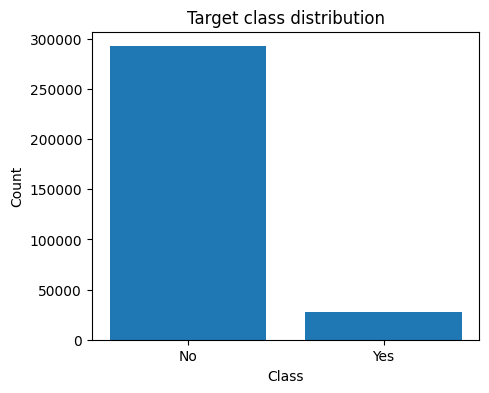

In [7]:
# Class distribution plot
import matplotlib.pyplot as plt
counts = df[target_col].value_counts()
plt.figure(figsize=(5,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title('Target class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [27]:
# Cleaning & split
# Drop duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print('Dropped', before-after, 'duplicates')

X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

# Map target labels to numerical values
if y.dtype == 'object':
    y = y.map({'No': 0, 'Yes': 1})
    print("Mapped target labels to numerical values: 0='No', 1='Yes'")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train/Test shapes:', X_train.shape, X_test.shape)
X_train.sample(10)

Dropped 0 duplicates
Mapped target labels to numerical values: 0='No', 1='Yes'
Train/Test shapes: (241373, 17) (60344, 17)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
151294,23.52,No,No,No,0.0,0.0,No,Female,70-74,Black,No,Yes,Very good,10.0,No,No,No
197929,25.68,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Excellent,5.0,Yes,No,No
104117,49.42,No,No,No,5.0,5.0,No,Female,30-34,White,Yes,Yes,Fair,7.0,No,No,No
180038,28.29,No,No,No,2.0,0.0,No,Female,75-79,White,Yes,Yes,Good,9.0,Yes,Yes,No
224907,27.05,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Excellent,7.0,No,No,No
295288,20.60,No,No,No,0.0,1.0,No,Female,30-34,White,No,Yes,Very good,5.0,No,No,No
227468,34.54,No,No,No,0.0,0.0,No,Female,35-39,White,No,Yes,Very good,8.0,No,No,No
26856,28.75,Yes,No,No,0.0,0.0,No,Male,25-29,White,No,Yes,Very good,7.0,No,No,No
58995,29.53,No,No,No,0.0,0.0,No,Male,55-59,White,No,Yes,Excellent,7.0,No,No,No
36879,30.68,Yes,No,No,30.0,30.0,Yes,Male,45-49,White,Yes,No,Good,5.0,No,No,No


In [28]:
# Preprocessor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print('num_cols', num_cols)
print('cat_cols', cat_cols)

numeric_transformer = Pipeline([('scaler', StandardScaler())])
cat_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols), 
    ('cat', cat_transformer, cat_cols)])

preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
print('Preprocessor fitted. Transformed feature count:', preprocessor.transform(X_train).shape[1])

num_cols ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
cat_cols ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Preprocessor fitted. Transformed feature count: 50


In [29]:
# SMOTE resampling (if imblearn available)
from collections import Counter
print('Before:', Counter(y_train))
try:
    from imblearn.over_sampling import SMOTE
    X_train_trans = preprocessor.transform(X_train)
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train_trans, y_train)
    print('After SMOTE:', Counter(y_res))
    smote_used = True
except Exception as e:
    print('SMOTE not available or failed:', e)
    X_res = preprocessor.transform(X_train)
    y_res = y_train.values
    smote_used = False

print('X_res shape:', X_res.shape)


Before: Counter({0: 219564, 1: 21809})
After SMOTE: Counter({0: 219564, 1: 219564})
X_res shape: (439128, 50)


In [34]:
# Baseline CV for multiple models
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier()
}
def Train(name , model):
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    results = []
    try:
        # scores = cross_val_score(model, X_res, y_res, cv=cv, scoring='f1')
        # print(name, 'F1:', np.round(scores,4), 'mean=', np.round(scores.mean(),4))
        # results.append({'model': name, 'f1_mean': float(scores.mean())})
        
        prec_scores = cross_val_score(model, X_res, y_res, cv=cv, scoring='precision',n_jobs=-1)
        print(name, 'Precision:', np.round(prec_scores, 4), 'mean=', np.round(prec_scores.mean(), 4))
        results.append({'model': name, 'precision_mean': float(prec_scores.mean())})
        
    except Exception as e:
        print('Failed', name, e)

    pd.DataFrame(results).sort_values('precision_mean', ascending=False)


In [35]:
#Logistic Regression

Train('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42))    

Logistic Regression Precision: [0.7533 0.75   0.7513] mean= 0.7515


In [36]:
#random Forest
Train('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42,n_jobs=-1))

Random Forest Precision: [0.9241 0.923  0.923 ] mean= 0.9233


In [38]:
#gradient Boosting
Train('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, random_state=42))

Gradient Boosting Precision: [0.8986 0.8952 0.8976] mean= 0.8972


In [39]:
#Hist Gradient Boosting
Train('Hist Gradient Boosting', HistGradientBoostingClassifier(random_state=42))

Hist Gradient Boosting Precision: [0.9279 0.9284 0.9282] mean= 0.9282


In [ ]:
#SVC
Train('SVC', SVC(probability=True, random_state=42))

In [44]:
#KNeighbors
Train('KNeighbors', KNeighborsClassifier())

KNeighbors Precision: [0.7981 0.7957 0.798 ] mean= 0.7973


In [46]:
# Hyperparameter tuning with RandomizedSearchCV for RandomForest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rf_param_dist = {
    'n_estimators': [100,200,400],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'class_weight': [None, 'balanced']
}

try:
    rf_search = RandomizedSearchCV(rf, rf_param_dist, n_iter=20, scoring='precision', cv=cv, random_state=42, n_jobs=-1)
    rf_search.fit(X_res, y_res)
    print('Best RF score:', rf_search.best_score_)
    print('Best RF params:', rf_search.best_params_)
    best_rf = rf_search.best_estimator_
except Exception as e:
    print('RF tuning failed:', e)
    best_rf = None


Best RF score: 0.9251576326376049
Best RF params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}


In [47]:
# Final evaluation of best RF on test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

final_results = []
if best_rf is not None:
    try:
        X_test_trans = preprocessor.transform(X_test)
        y_pred = best_rf.predict(X_test_trans)
        y_proba = best_rf.predict_proba(X_test_trans)[:,1] if hasattr(best_rf, 'predict_proba') else None
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        print('RF test accuracy:', acc)
        print('RF test precision:', prec)
        print('RF test recall:', rec)
        print('RF test f1:', f1)
        print('RF test roc:', roc)
        print('Confusion matrix:')
        print(confusion_matrix(y_test, y_pred))
        print('Classification report:')
        print(classification_report(y_test, y_pred, zero_division=0))
        final_results.append({'model': 'RandomForest', 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc})
    except Exception as e:
        print('Final evaluation failed', e)
else:
    print('No tuned RF available to evaluate')

import pandas as pd
pd.DataFrame(final_results)


RF test accuracy: 0.8726799681824208
RF test precision: 0.2744186046511628
RF test recall: 0.24889948642699927
RF test f1: 0.2610368375492931
RF test roc: 0.7849750763174045
Confusion matrix:
[[51304  3588]
 [ 4095  1357]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     54892
           1       0.27      0.25      0.26      5452

    accuracy                           0.87     60344
   macro avg       0.60      0.59      0.60     60344
weighted avg       0.87      0.87      0.87     60344



,model,accuracy,precision,recall,f1,roc_auc
0,RandomForest,0.87268,0.274419,0.248899,0.261037,0.784975


In [49]:
# Save best model and results if available
from pathlib import Path
import joblib
models_dir = Path('improved_models')
models_dir.mkdir(parents=True, exist_ok=True)
if best_rf is not None:
    try:
        joblib.dump(best_rf, models_dir / 'best_random_forest.joblib')
        print('Saved best_random_forest.joblib')
    except Exception as e:
        print('Saving failed', e)

# Save results CSV
try:
    pd.DataFrame(final_results).to_csv('improved_model_results_summary.csv', index=False)
    print('Saved improved_model_results_summary.csv')
except Exception as e:
    print('Saving results failed', e)


Saved best_random_forest.joblib
Saved improved_model_results_summary.csv
